In [319]:
#Import the required libraries needed to clean data
from math import e
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [320]:
# Load the data into the dataframe
df = pd.read_csv('/content/raw_house_data.csv')

In [321]:
# Check the shape of the data
df.shape

(5000, 16)

In [322]:
# Check the types of the data
df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [323]:
# Create a list of the miissing values and change the missing values all to NaN
missing_values = ['N/a', 'na', 'Null','None', np.nan]
df = pd.read_csv('/content/raw_house_data.csv', na_values=missing_values)

In [324]:
# Check for the amount of missing value in each column
df.isnull().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces           25
floor_covering        1
HOA                 562
dtype: int64

In [325]:
# Check the percent of the value of missing data
pct_missing = df.isnull().sum() * 100 / len(df)
pct_missing

MLS                  0.00
sold_price           0.00
zipcode              0.00
longitude            0.00
latitude             0.00
lot_acres            0.20
taxes                0.00
year_built           0.00
bedrooms             0.00
bathrooms            0.12
sqrt_ft              1.12
garage               0.14
kitchen_features     0.66
fireplaces           0.50
floor_covering       0.02
HOA                 11.24
dtype: float64

In [326]:
# Seperate the numeric columns from the categorical columns
# Numeric columns
df_num = df.select_dtypes(include=[np.number])
num_cols = df_num.columns.values.tolist()
# Non-numeric columns
df_non_num = df.select_dtypes(exclude=[np.number])
non_num_cols = df_non_num.columns.values.tolist()
non_num_cols

['kitchen_features', 'floor_covering', 'HOA']

In [327]:
# Drop the values which will not change the data significantly
subset = ['garage', 'bathrooms', 'floor_covering']
df1 = df.dropna(how='any', subset=subset)
df1.shape

(4987, 16)

In [328]:
# Fill in the missing values

mean_bathr = int(df1['bathrooms'].mean())
mean_garage = int(df1['garage'].mean())
mean_lot = int(df1['lot_acres'].mean())
mean_fire = int(df1['fireplaces'].mean())
mean_sqrt_ft = int(df1['sqrt_ft'].mean())
kitch = 'No features in this house'

df2 = df1.fillna({
    'bathrooms': mean_bathr,
    'garage': mean_garage,
    'HOA': 0,
    'fireplaces': mean_fire,
    'lot_acres': mean_lot,
    'sqrt_ft': mean_sqrt_ft,
    'kitchen_features': kitch
})
df2.shape

(4987, 16)

In [329]:
# Check that all missing data are filled
df2.isnull().sum()

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

Use boxplots to check for outliers

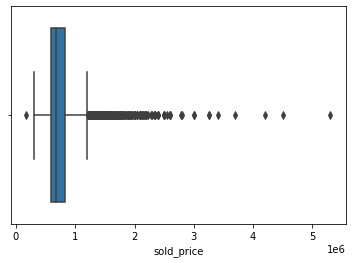

In [330]:
sns.boxplot(x=df2['sold_price'])

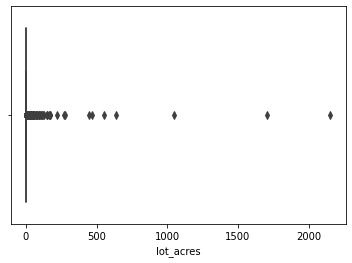

In [331]:
sns.boxplot(x=df2['lot_acres'])

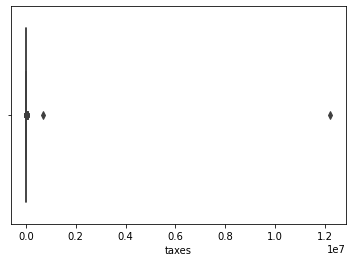

In [332]:
sns.boxplot(x=df2['taxes'])

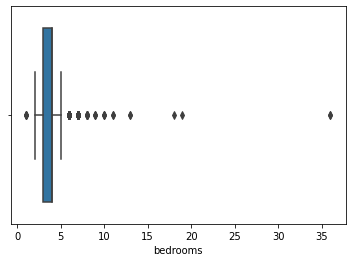

In [333]:
sns.boxplot(x=df2['bedrooms'])

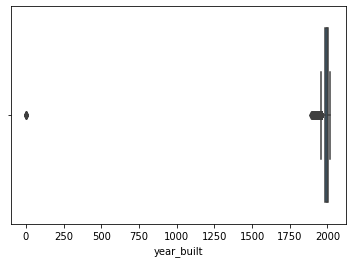

In [334]:
sns.boxplot(x=df2['year_built'])

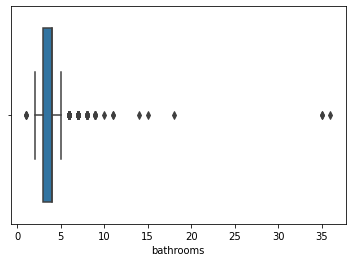

In [335]:
sns.boxplot(x=df2['bathrooms'])

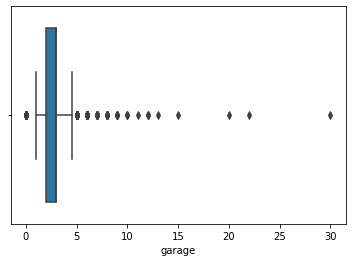

In [336]:
sns.boxplot(x=df2['garage'])

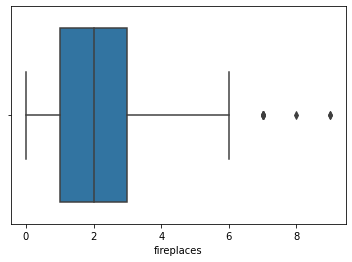

In [337]:
sns.boxplot(x=df2['fireplaces'])

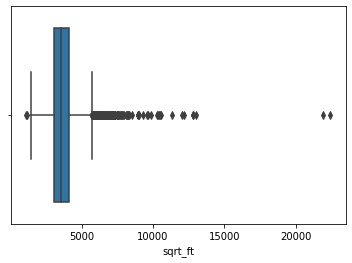

In [338]:
sns.boxplot(x=df2['sqrt_ft'])

Delete all the outliers using reasonable conditioning
Than replot the data in box plots to compare.

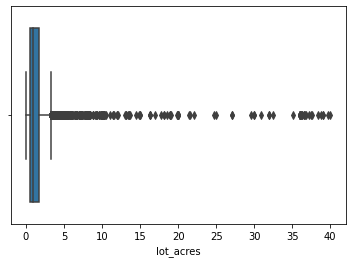

In [339]:
df3 = df2.drop(df2[df2['lot_acres'].values > 40].index)
sns.boxplot(x=df3['lot_acres'])

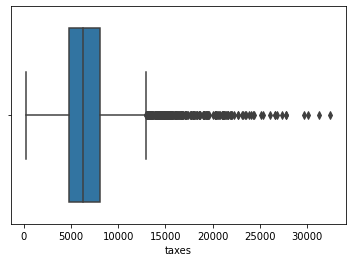

In [340]:
df4 = df3.drop(df3[df3['taxes'].values > 40000].index)
df5 = df4.drop(df4[df4['taxes'].values < 200].index)
sns.boxplot(x=df5['taxes'])

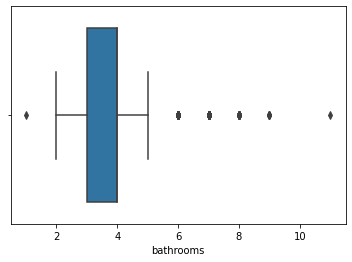

In [341]:
df6 = df5.drop(df5[df5['bathrooms'].values > 11].index)
sns.boxplot(x=df6['bathrooms'])

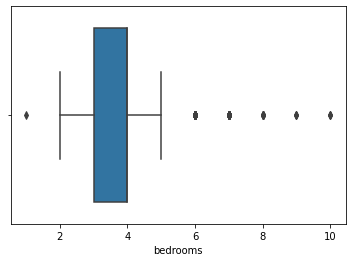

In [342]:
df7 = df6.drop(df6[df6['bedrooms'].values > 15].index)
sns.boxplot(x=df6['bedrooms'])

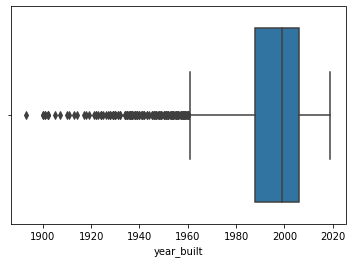

In [343]:
df8 = df7.drop(df7[df7['year_built'].values < 1800].index)
sns.boxplot(x=df8['year_built'])

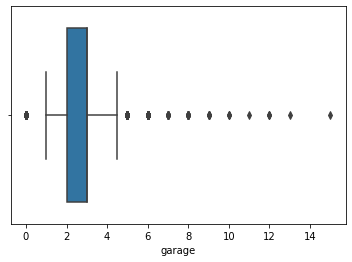

In [344]:
df9 = df8.drop(df8[df8['garage'].values > 19].index)
sns.boxplot(x=df9['garage'])

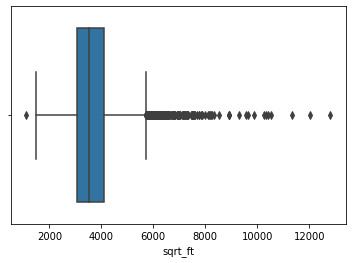

In [345]:
df10 = df9.drop(df9[df9['sqrt_ft'].values > 7000].index)
sns.boxplot(x=df9['sqrt_ft'])

In [346]:
# Create a correlation matrix
corr_Matrix = df10.corr()
corr_Matrix

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
MLS,1.000000,0.051879,0.302809,0.099656,0.429567,-0.073779,0.057243,-0.029297,0.077994,0.006708,-0.023965,-0.012078,-0.009334
sold_price,0.051879,1.000000,-0.022840,-0.056518,0.107893,0.038014,0.585676,0.151996,0.119525,0.443522,0.553879,0.123937,0.372831
zipcode,0.302809,-0.022840,1.000000,0.126317,0.383434,-0.133165,0.034483,-0.019384,0.135940,-0.003857,0.044056,0.074675,0.014574
longitude,0.099656,-0.056518,0.126317,1.000000,-0.257204,0.237570,-0.066560,-0.112865,0.098729,0.005470,0.070505,-0.025356,0.054102
latitude,0.429567,0.107893,0.383434,-0.257204,1.000000,-0.287124,0.093611,0.150004,-0.036289,-0.009508,-0.059961,0.054339,-0.043503
lot_acres,-0.073779,0.038014,-0.133165,0.237570,-0.287124,1.000000,0.085303,-0.029211,0.034582,0.034142,0.098509,0.032552,0.078238
taxes,0.057243,0.585676,0.034483,-0.066560,0.093611,0.085303,1.000000,0.100640,0.191703,0.415311,0.589654,0.191206,0.412471
year_built,-0.029297,0.151996,-0.019384,-0.112865,0.150004,-0.029211,0.100640,1.000000,-0.139317,0.029608,-0.000239,0.354659,-0.106490
bedrooms,0.077994,0.119525,0.135940,0.098729,-0.036289,0.034582,0.191703,-0.139317,1.000000,0.469937,0.496829,0.151344,0.188613
bathrooms,0.006708,0.443522,-0.003857,0.005470,-0.009508,0.034142,0.415311,0.029608,0.469937,1.000000,0.688560,0.228994,0.283723


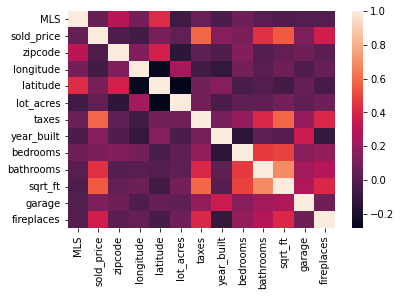

In [347]:
# Plot the correlation on a heatmap

sns.heatmap(corr_Matrix, annot=False)
plt.show()

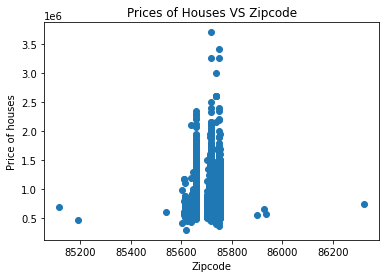

In [359]:
# PLot the Prces of each house with respect to the zipcode

plt.title("Prices of Houses VS Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price of houses")
plt.scatter(df10['zipcode'], df10['sold_price'])

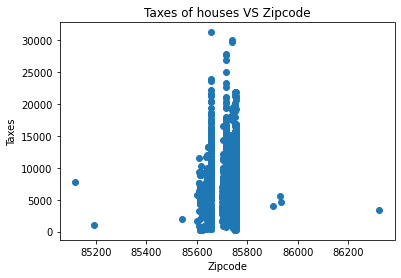

In [349]:
# Plot the taxes the houses with respect to the zipcode

plt.title("Taxes of houses VS Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Taxes")
plt.scatter(df10['zipcode'], df10['taxes'])

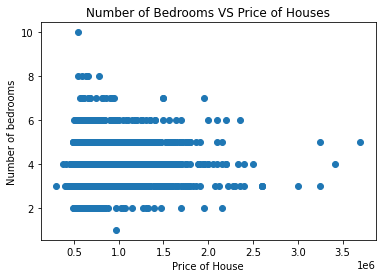

In [350]:
#PLot the number of bedrooms with respect to the price of houses

plt.title("Number of Bedrooms VS Price of Houses")
plt.xlabel("Price of House")
plt.ylabel("Number of bedrooms")
plt.scatter(df10['sold_price'], df10['bedrooms'])

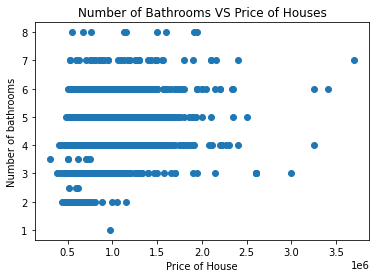

In [353]:
# Plot the numer of bathrooms with respect to prices of houses

plt.title("Number of Bathrooms VS Price of Houses")
plt.xlabel("Price of House")
plt.ylabel("Number of bathrooms")
plt.scatter(df10['sold_price'], df10['bathrooms'])

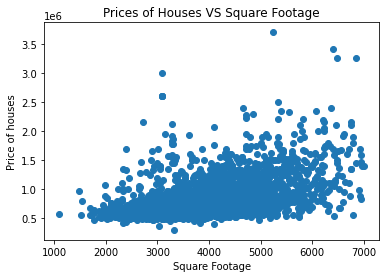

In [358]:
# Plot the price of the houses with respect to the square footage

plt.title("Prices of Houses VS Square Footage")
plt.xlabel("Square Footage")
plt.ylabel("Price of houses")
plt.scatter(df10['sqrt_ft'], df10['sold_price'])